# Example using radio-z to fit a catalogue of SKA simulations

In [1]:
from radio_z import hifit, saxdata, hiprofile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
%matplotlib nbagg

### Read in an example catalogue with the SAX parameters from an HDF5 file

In [13]:
cat_name = 'uniform_snr_100.h5'
output_root = './' # Directory where to store the resulting data files and chains

In [3]:
surv = saxdata.Survey('ska1_band1')
cat = saxdata.SaxCatalogue(cat_name)
cat_df = cat.get_data()

/home/michelle/Project/HI_fit/radio_z/radio_z/saxdata.py:484: RuntimeWarning: divide by zero encountered in true_divide
  return 260e-6 * (25000/20) / (AoT * self.nantennas) * (0.01 / self.delta_nu) ** (0.5) * (1 / tp) ** 0.5


In [4]:
cat_df

,id,galaxyid,box,ra,decl,distance,zapparent,hubbletype,himass,h2mass,...,v0,w_obs_20,w_obs_50,w_obs_peak,psi_obs_max,psi_obs_0,snr_band1_std,snr_band2_std,snr_band1_santos,snr_band2_santos
16428,ID95316429,1.080035e+14,4.0,-0.912437,-0.558843,2375.83,0.671200,7.4,4.090000e+09,2.630000e+09,...,-120488.271900,260.0,248.0,219.00,0.000012,5.464800e-06,0.029162,0.000000,0.456487,0.000000
34072,ID66334073,1.670112e+14,3.0,-0.213258,1.682010,1711.10,0.460602,10.0,2.200000e+09,9.080000e+08,...,-94605.238114,199.0,187.0,160.00,0.000017,8.720000e-06,0.039420,0.057209,0.536021,0.777906
39036,ID103539037,1.480007e+14,4.0,0.091320,1.844890,2615.24,0.753543,99.0,2.770000e+09,1.970000e+08,...,-128917.796712,88.4,77.5,52.30,0.000017,1.026900e-05,0.057801,0.000000,0.523692,0.000000
67858,ID86967859,6.900048e+13,4.0,-1.384260,-1.657880,2308.46,0.647386,6.3,5.030000e+09,3.300000e+09,...,-117893.317049,249.0,237.0,212.00,0.000017,7.508700e-06,0.039411,0.000000,0.602664,0.000000
4195,ID162904196,3.960050e+14,7.0,0.372706,-1.175770,4137.71,1.389630,10.0,1.770000e+10,8.570000e+09,...,-174457.552006,337.0,325.0,296.00,0.000010,4.062600e-06,0.028971,0.000000,0.521858,0.000000
1948,ID205301949,1.410055e+14,8.0,0.611725,1.459530,5310.27,2.075390,10.0,1.160000e+10,1.430000e+10,...,-202451.396408,410.0,397.0,365.00,0.000002,1.056480e-06,0.007544,0.000000,0.146063,0.000000
64572,ID213864573,1.720008e+14,9.0,1.781900,-0.037096,5494.17,2.204880,7.9,7.520000e+09,8.200000e+09,...,-206392.751055,300.0,288.0,262.00,0.000002,8.415000e-07,0.005889,0.000000,0.098152,0.000000
54921,ID131854922,3.950002e+14,5.0,0.085970,0.695611,3390.86,1.050680,2.5,4.000000e+09,2.420000e+08,...,-153707.063023,488.0,472.0,381.00,0.000002,1.152000e-06,0.007502,0.000000,0.165269,0.000000
68378,ID127568379,4.380001e+14,5.0,-0.381009,1.799590,3208.13,0.974145,99.0,3.540000e+09,1.660000e+08,...,-148035.478650,144.0,132.0,107.00,0.000008,4.127200e-06,0.026055,0.000000,0.309459,0.000000
66372,ID156366373,2.560000e+14,6.0,0.879560,1.286010,4099.18,1.369920,99.0,5.960000e+09,1.530000e+09,...,-173413.448555,169.0,157.0,132.00,0.000006,3.048000e-06,0.021663,0.000000,0.270253,0.000000


### Create the mock HI data from the SAX parameters for the whole catalogue

In [24]:
make_new_data = True
data_maker = saxdata.DataFromCatalogue()

if make_new_data:
    cat.write_to_disk(output_root)
    data_maker.create_from_cat(surv, filepath=output_root)
ids = cat.get_ids()

/home/michelle/Project/HI_fit/radio_z/radio_z/saxdata.py:484: RuntimeWarning: divide by zero encountered in true_divide
  return 260e-6 * (25000/20) / (AoT * self.nantennas) * (0.01 / self.delta_nu) ** (0.5) * (1 / tp) ** 0.5


### Each object is stored in a separate dataframe in the HDF5 file. We can plot an example profile to have a look.

<IPython.core.display.Javascript object>


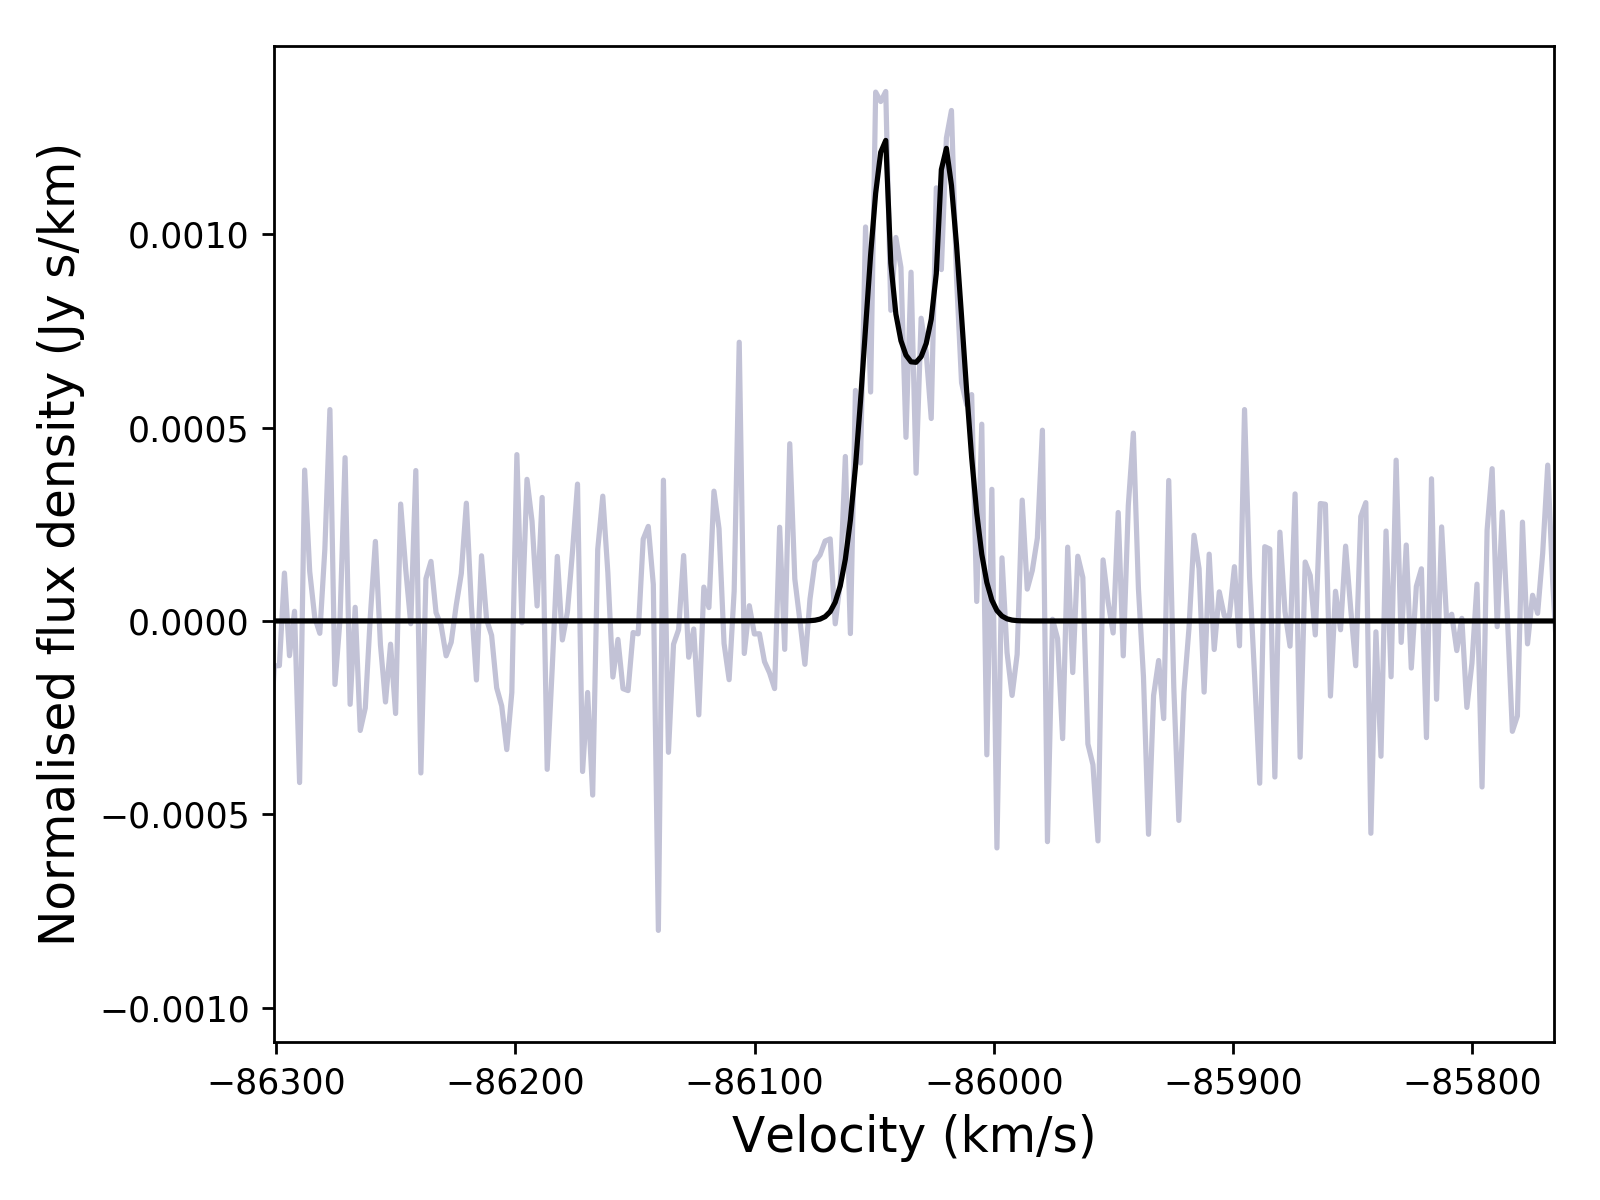

In [5]:
ind = 'ID59239024'
data_maker = saxdata.DataFromCatalogue()
data = pd.read_hdf(output_root+ind+'.hdf5', 'data')
model_params = pd.read_hdf(output_root+ind+'.hdf5', 'parameters')[data_maker.profile_params].values[0]
plt.figure()
data_maker.plot_profile(data, plot_model=True, model_params=model_params, zoom=True)

### Fit a single object

In [6]:
fl = output_root+ind+'.hdf5'
fd = hifit.FitData(filename=fl)

In [7]:
fd.fit(chain_name=output_root+ind+'chain-', save_to_hdf=True, delete_files=False)

/home/michelle/Project/HI_fit/radio_z/radio_z/hiprofile.py:143: RuntimeWarning: overflow encountered in power
  psi[v1] = self.psi_obs_max * np.exp(self._k1() * pow(abs(v[v1]) - self._k3(), self._k2()))
/home/michelle/Project/HI_fit/radio_z/radio_z/hiprofile.py:143: RuntimeWarning: overflow encountered in multiply
  psi[v1] = self.psi_obs_max * np.exp(self._k1() * pow(abs(v[v1]) - self._k3(), self._k2()))
/home/michelle/Project/HI_fit/radio_z/radio_z/hiprofile.py:51: RuntimeWarning: overflow encountered in double_scalars
  retvar = -0.693*pow(2.322, numerator/denominator)
/home/michelle/Project/HI_fit/radio_z/radio_z/hiprofile.py:143: RuntimeWarning: invalid value encountered in multiply
  psi[v1] = self.psi_obs_max * np.exp(self._k1() * pow(abs(v[v1]) - self._k3(), self._k2()))


Time taken 11.347997148831686 minutes


<IPython.core.display.Javascript object>


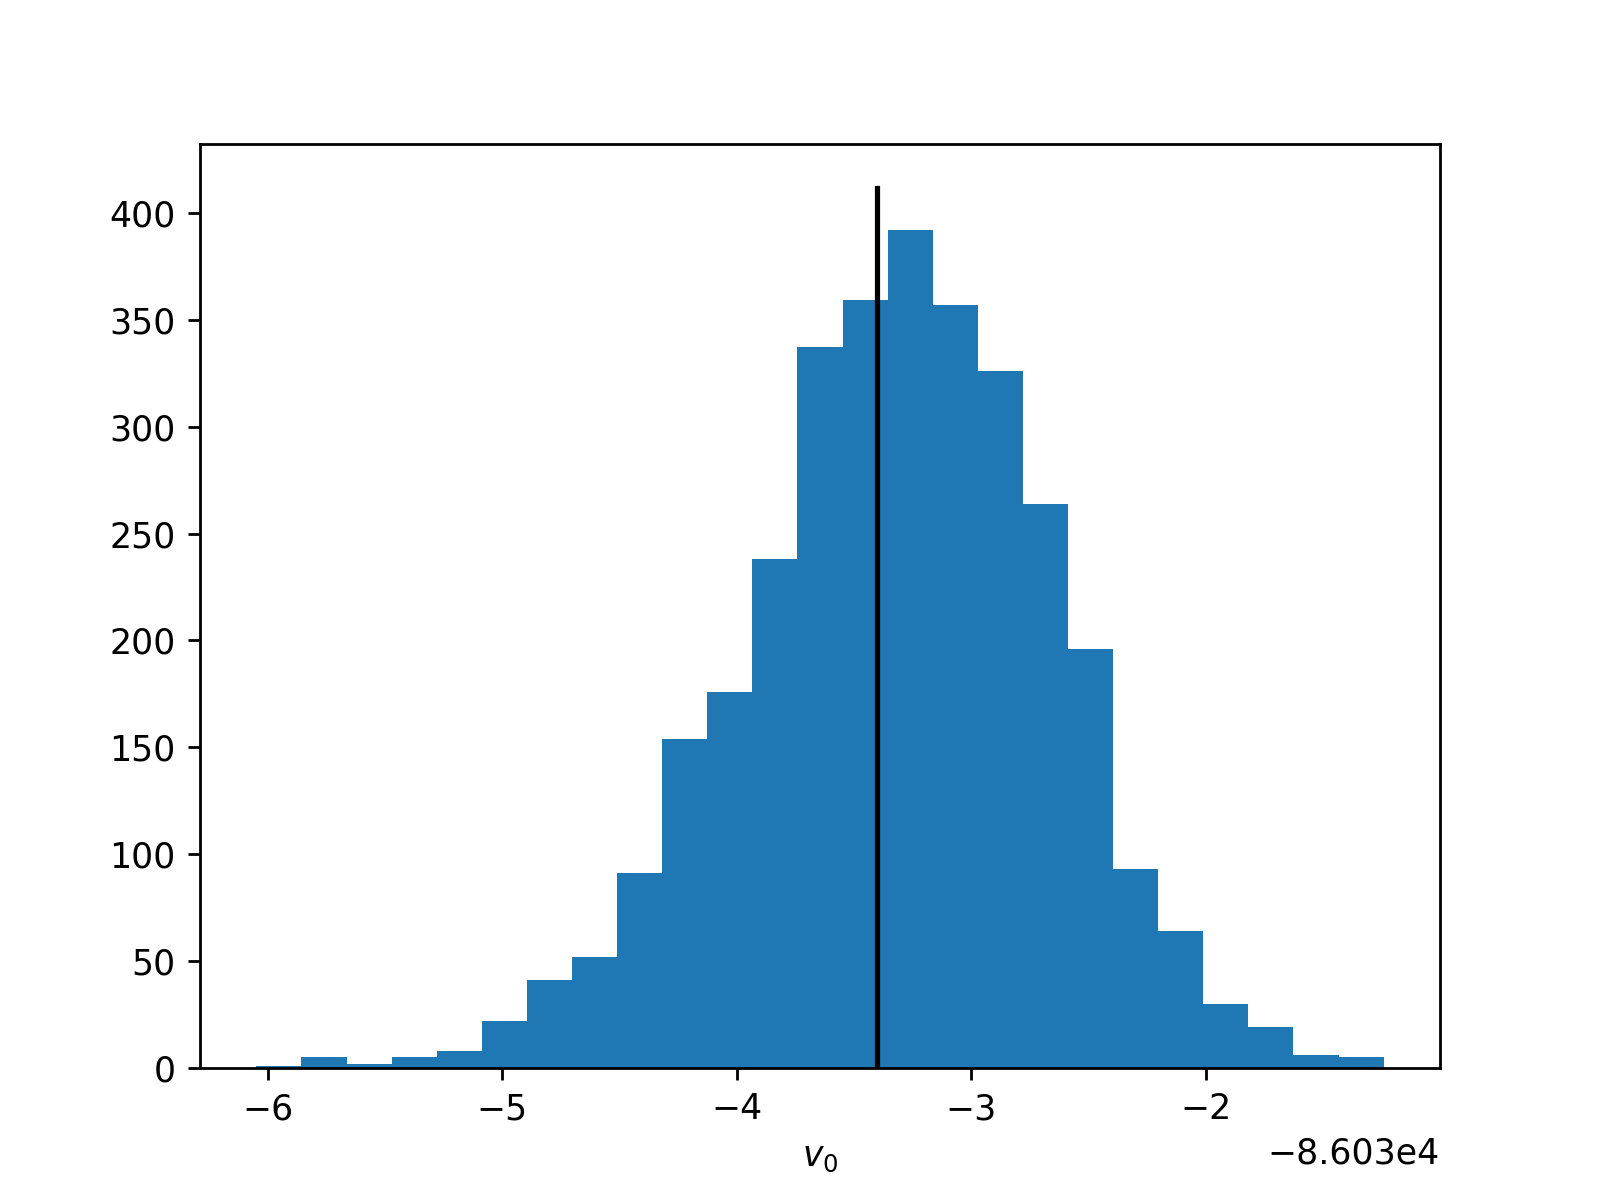

In [23]:
chain=pd.read_hdf(fl,'chain')
ev = pd.read_hdf(fl, 'evidence')
params = pd.read_hdf(fl, 'parameters')
plt.figure()
plt.hist(chain.v0,25);
plt.plot([params.v0.iloc[0], params.v0.iloc[0]], plt.gca().get_ylim(),'k')
plt.xlabel('$v_0$')

In [9]:
ev

,ln(evidence),uncertainty,IS ln(evidence),Bayes factor
0,-34804.873347,0.219651,-34808.393208,145.618127


### This object allows us to fit the whole catalogue, in parallel if requested

In [189]:
fc = hifit.FitCatalogue(output_root)

In [285]:
run_multinest = False #In case we've already run these

In [191]:
if run_multinest:
    fc.fit_all(nprocesses=8, output_dir=outputr_root,save_to_hdf=True, delete_files=True)

Fitting object ID78105238
Fitting object ID59807857
Fitting object ID217782840
Fitting object ID184248873
Fitting object ID54409736
Fitting object ID71900564
Fitting object ID54518889
Fitting object ID65294522
Deleting files
Time taken 8.523706761995951 minutes
Fitting object ID54167464
Deleting files
Time taken 9.019851398468017 minutes
Fitting object ID54290136
Deleting files
Time taken 11.328619158267974 minutes
Fitting object ID65582848
Deleting files
Time taken 12.162389326095582 minutes
Fitting object ID49557813
Deleting files
Time taken 15.18105481863022 minutes
Fitting object ID49558032
Deleting files
Time taken 22.393951765696208 minutes
Fitting object ID78023014
Deleting files
Time taken 18.584374233086905 minutes
Fitting object ID72596820
Deleting files
Time taken 33.14057511488597 minutes
Fitting object ID59813587
Deleting files
Time taken 34.63148579200109 minutes
Fitting object ID65285561
Deleting files
Time taken 10.267814024289448 minutes
Fitting object ID59699020
Delet

### Analyse the Multinest chains

You can use the ChainAnalyser object to run useful analyses, such as getting the best fit estimates of the parameters, the errors (in terms of 16% and 84% marginals) and P(z) as a histogram. Here we print out the bias for each parameter for each object, measured in n sigma.

In [14]:
fls = glob.glob(output_root+'*.hdf5')

In [15]:
for f in fls:
    An = hifit.ChainAnalyser(f)
    prms = pd.read_hdf(f,'parameters')[An.param_names[:-1]]
    prms = prms.as_matrix()[0]
    An.parameter_estimates(true_params=prms, save_to_file=True)

In [19]:
param ='z'
plot_df = pd.DataFrame(data=[], columns=['id', param+'_true', param+'_est', param+'_err', 'bayes'])
for f in fls:
    ests = pd.read_hdf(f, 'summary')
    prms = pd.read_hdf(f, 'parameters')
    ev = pd.read_hdf(f, 'evidence')
    ind = prms.id.iloc[0]
    true_param = ests.loc[param,'True']
    map_param = ests.loc[param,'MAP']
    bayes_fact = ev['Bayes factor'].iloc[0]
    sig = ((ests.loc[param,'upper_1sigma']-ests.loc[param,'MAP'])+(ests.loc[param,'MAP'])-ests.loc[param,'lower_1sigma'])/2
    plot_df.loc[len(plot_df)] = [ind, true_param, map_param, sig, bayes_fact]

<IPython.core.display.Javascript object>


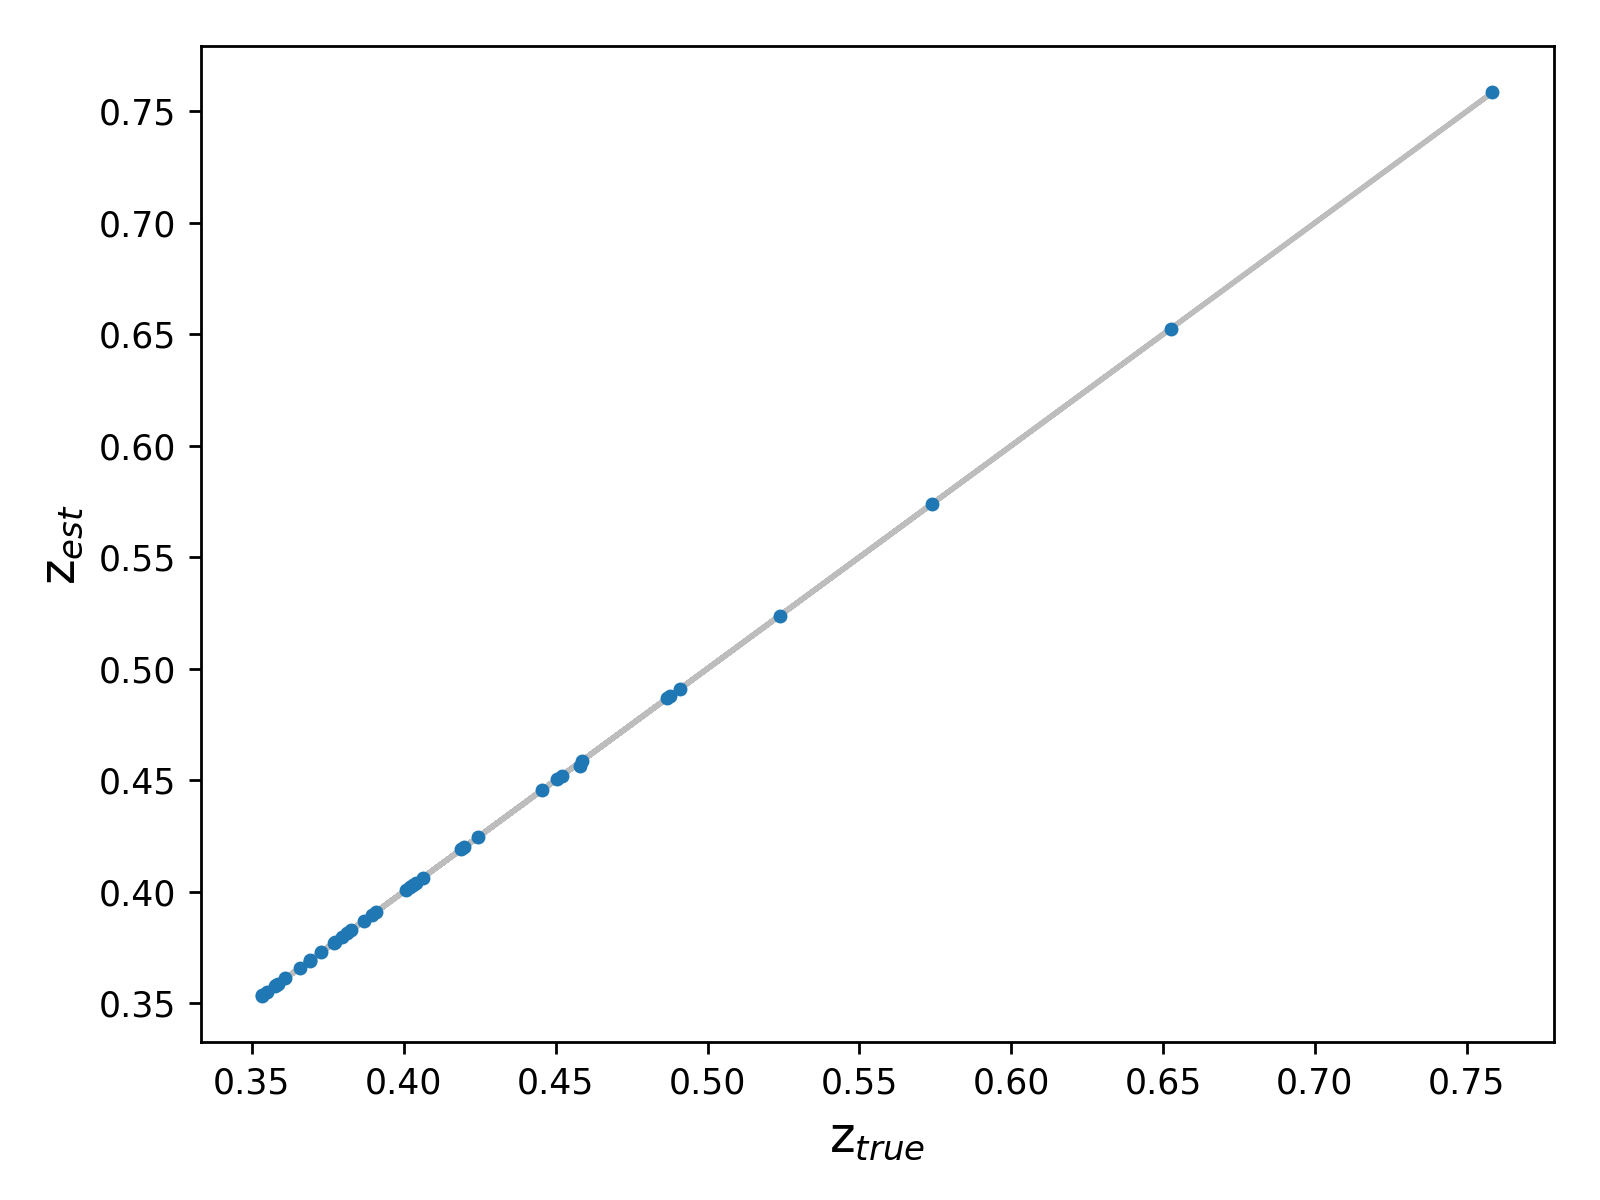

In [22]:
plt.figure()
mask = plot_df.bayes>5
#mask = [True]*len(plot_df)
x=plot_df.z_true[mask].as_matrix()
y=plot_df.z_est[mask]
y=y.as_matrix()
yerr=plot_df.z_err[mask].as_matrix()
plt.errorbar(x, y, yerr=yerr, linestyle='none', marker='.')
plt.plot(x, x,c='#bdbdbd',zorder=0)
fntsz = 14
plt.xlabel('z$_{true}$', fontsize=fntsz)
plt.ylabel('z$_{est}$', fontsize=fntsz)
plt.tight_layout()